 num [1:999] 0.4817 0.8908 -0.4728 1.8 -0.0445 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.987622 -0.647331 -0.003381  0.007659  0.697191  3.038755 

       m               data_1         
 Min.   :-8.9377   Min.   :-2.987622  
 1st Qu.:-2.2801   1st Qu.:-0.647331  
 Median :-0.1910   Median :-0.003381  
 Mean   :-0.1656   Mean   : 0.007659  
 3rd Qu.: 2.0706   3rd Qu.: 0.697191  
 Max.   : 9.1281   Max.   : 3.038755  

'data.frame':	999 obs. of  2 variables:
 $ m     : num  -0.203 3.764 -3.286 0.127 4.126 ...
 $ data_1: num  0.4817 0.8908 -0.4728 1.8 -0.0445 ...


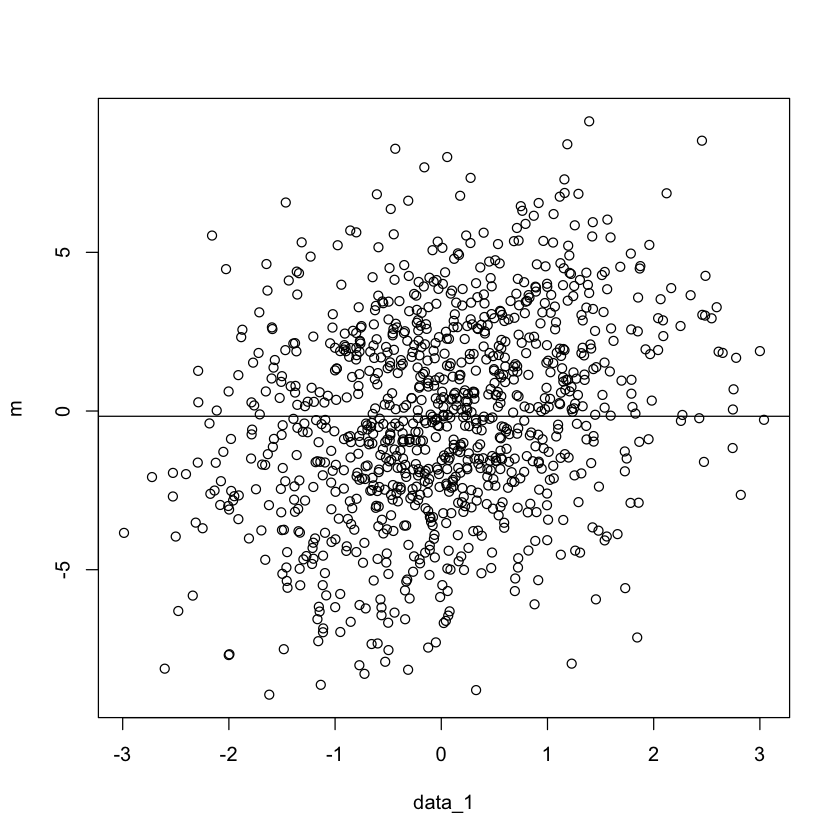

In [3]:
#problem 1
data_1<-rnorm(999,0,1)
str(data_1)
summary(data_1)
error_term<-rnorm(999,0,3)
m<-0.9*data_1+error_term
data_2<-data.frame(m,data_1)
summary(data_2)
str(data_2)
plot(m~data_1, data=data_2)
mean.m<-mean(m,data=data_2, na.rm = TRUE)
abline(h=mean.m)
model_1<-lm(m~data_1, data=data_2)

In [4]:
#model_1
#summary(model_1)
abline(model_1, col="red")
#adding outlier z to change slope to negative
z<-c(-50,999)
data_3<-rbind(data_2,z)
plot(m~data_1, data=data_3)
mean.m1<-mean(m, data=data_3)
abline(h=mean.m1)
model_2<-lm(m~data_1, data=data_3)
model_2
summary(model_2)
abline(model_2, col="darkorchid3")

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


Warning message in plot.window(...):
“"data" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"data" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"data" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"data" is not a graphical parameter”Warning message in box(...):
“"data" is not a graphical parameter”Warning message in title(...):
“"data" is not a graphical parameter”

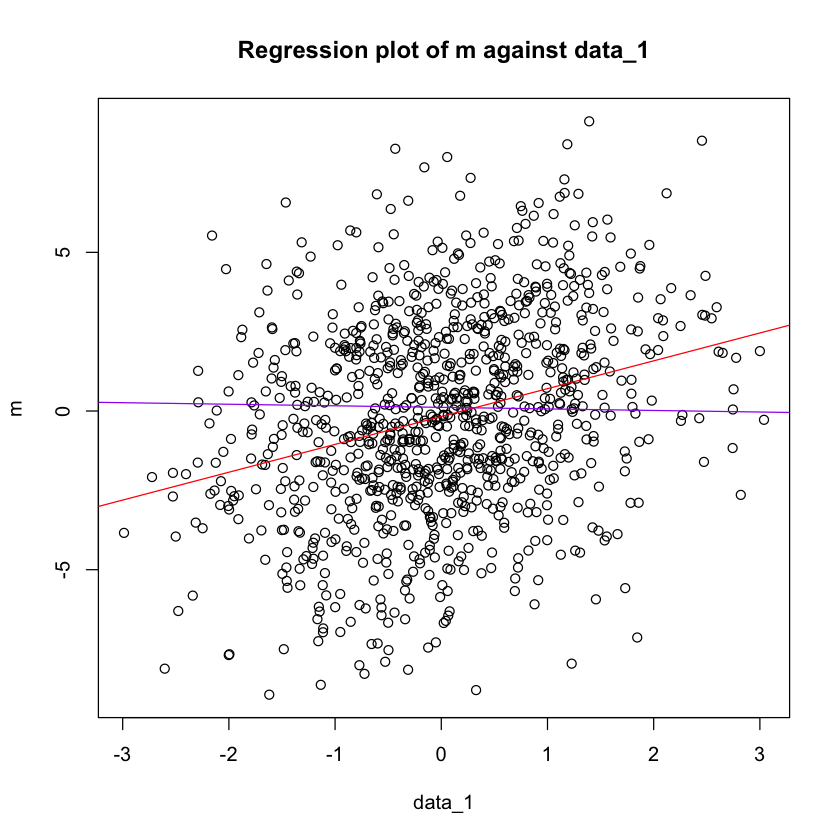

In [5]:
#plot(model_2)
plot(data_1,m,data=data_3, xlab = "data_1", ylab = "m", main = "Regression plot of m against data_1")
abline(model_1, col="Red")
abline(model_2, col="purple")

In [2]:
#Problem 2
install.packages("Hmisc")
library(Matching)
library(dplyr)
library(Hmisc)
data(lalonde)
library(arm)
# getting data that treatment is not equal 1
lalonde_treatmeat<-lalonde%>%filter(treat!=1)
#Creating a linear model
lalonde_treatmeat$age[17:55]
summary(lalonde_treatmeat)
model_3_lalonde<-lm(re78~age + educ + re74 + re75 + educ*re74 + educ*re75 + age*re74 + age*re75 + age*age+ re74*re75,data=lalonde_treatmeat)
summary(model_3_lalonde)
set.seed(1)
lalonde_sim<-sim(model_3_lalonde, n.sim = 10000)
lalonde_sim
#finding medians of educ, re74, and re75
educ_median<-median(lalonde$educ)
educ_median
re75_median<-median(lalonde$re75)
re75_median
re74_median<-median(lalonde$re74)
re74_median
lalonde_sim_coef <- lalonde_sim@coef
lalonde_sim_coef
age_interval<- matrix(NaN,nrow=10000,ncol=39)
for(age in c(17:55)) {
  for(i in 1:10000) 
  {
    med_re78 <- sum(lalonde_sim_coef[i,]*(c(1, age,educ_median,re74_median,re75_median,educ_median*re74_median,educ_median*re75_median, age*re74_median, age*re75_median,age*age, re74_median*re75_median)))
    age_interval[i, age-16] <-med_re78
  }
}
conf_intervals_1 <- apply(age_interval,MARGIN=2, quantile, probs = c(0.025,1-0.025))
conf_intervals_1

median_lalonde <- 0
for (i in 1:39) {
  median_lalonde [i] <- median(age_interval[i,])
}
median_lalonde 

table_1<-data.frame( "Age" = 17:55, "2.5%" = conf_intervals_1[1,], "Median" = median_lalonde , "97.5%" = conf_intervals_1[2,])
table_1

lalonde_sim<-sim(model_3_lalonde, n.sim = 10000)
educ_quantile <- quantile(lalonde$educ, probs = c(0.75))
educ_quantile
re74_quantile <- quantile(lalonde$re74, probs = c(0.75))
re75_quantile <- quantile(lalonde$re75, probs = c(0.75))

age_stored<-matrix(NA,nrow = 10000, ncol=39)
for(age in c(17:55)){
  for(k in 1:10000){
    quatile_re78<-sum(lalonde_sim_coef[k,]*(c(1,age,educ_quantile,re74_quantile,re75_quantile,educ_quantile*re74_quantile,educ_quantile*re75_quantile,age*re74_quantile,age*re75_quantile,age*age,re74_quantile*re74_quantile)))
    age_stored[k,age-16]<-quatile_re78
  }
}
c <- apply(age_stored,MARGIN=2, quantile, probs = c(0.025,1-0.025))
median_lalonde_1<-0
for (i in 1:39) {
  median_lalonde_1[i] <- median(age_stored[i,])
}
median_lalonde_1


table_2<-data.frame( "Age" = 17:55, "2.5%" = c[1,], "Median" = median_lalonde_1 , "97.5%" = c[2,])
table_2

age_interval_3<- matrix(NaN,nrow=10000,ncol=39)
for(age in c(17:55)) {
  for(i in 1:10000) 
  {
    med_re78_3 <- sum(lalonde_sim_coef[i,]*(c(1, age,educ_median,re74_median,re75_median,educ_median*re74_median,educ_median*re75_median, age*re74_median, age*re75_median,age*age, re74_median*re75_median,rnorm(1, 0, lalonde_sim@sigma[i]))))
    age_interval_3[i, age-16] <-med_re78_3
  }
}
conf_intervals_3 <- apply(age_interval_3,MARGIN=2, quantile, probs = c(0.025,1-0.025))
conf_intervals_3

median_lalonde_3 <- 0
for (i in 1:39) {
  median_lalonde_3 [i] <- median(age_interval_3[i,])
}
median_lalonde_3 

table_3<-data.frame( "Age" = 17:55, "2.5%" = conf_intervals_3[1,], "Median" = median_lalonde_3 , "97.5%" = conf_intervals_3[2,])
table_3

age_stored_1<-matrix(NA,nrow = 10000, ncol=39)
for(age in c(17:55)){
  for(k in 1:10000){
    quatile_re78_1<-sum(lalonde_sim_coef[k,]*(c(1,age,educ_quantile,re74_quantile,re75_quantile,educ_quantile*re74_quantile,educ_quantile*re75_quantile,age*re74_quantile,age*re75_quantile,age*age,re74_quantile*re74_quantile,rnorm(1, 0, lalonde_sim@sigma[i]))))
    age_stored_1[k,age-16]<-quatile_re78_1
  }
}
c_1 <- apply(age_stored_1,MARGIN=2, quantile, probs = c(0.025,1-0.025))
median_lalonde_2<-0
for (i in 1:39) {
  median_lalonde_2[i] <- median(age_stored_1[i,])
}
median_lalonde_2


table_4<-data.frame( "Age" = 17:55, "2.5%" = c_1[1,], "Median" = median_lalonde_2 , "97.5%" = c_1[2,])
table_4


plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,55), ylim = c(-10000,20000), xlab = "Age", ylab = "re78", main = "re78 95% prediction_intervals when predictors are held at medians")
counter = 1
for(age in 17:55) {
  segments(x0 = age,  y0 =conf_intervals_1[counter], x1 = age, y1 = conf_intervals_1[counter + 1])
  counter = counter + 2
}

plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,55), ylim = c(-9000000000,9000000000), xlab = "Age", ylab = "re78", main = "re78 95% prediction_intervals when predictors are held at 75th quatile")
counter = 1
for(age in 17:55) {
  segments(x0 = age,  y0 = c[counter], x1 = age, y1 =c[counter + 1])
  counter = counter + 2
}

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘viridisLite’, ‘survival’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(Matching): there is no package called ‘Matching’


In [9]:
#problem 3
library(MASS)
data(PlantGrowth)
header=TRUE
PlantGrowth_1<-PlantGrowth[!(PlantGrowth$group== "trt2"),]
#PlantGrowth_1$group[PlantGrowth_1$group=="trt1"]<-1
PlantGrowth_1


PlantGrowth_1$group2[PlantGrowth_1$group == "ctrl"] = 1
PlantGrowth_1$group2[PlantGrowth_1$group == "trt1"] = 0


model_3<-lm(group2~weight,data = PlantGrowth_1)
model_3
library(boot)
boot_strap<-function(data, index) {
  model_3<-lm(group2~weight,data = PlantGrowth_1, subset = index)
  coef.treat <- coef(model_3)[2]
}

sorage_coeffient<-rep(NA,1000)

store_coe <- data.frame("2.5%" = rep(NA, 100), "97.5%" = rep(NA, 100))

for (k in 1:100) {
  for (i in 1:1000) { 
    sorage_coeffient[i] <- boot_strap(PlantGrowth_1, sample(nrow(PlantGrowth_1), nrow(PlantGrowth_1), replace=TRUE))
  }
  store_coe[k,] <- quantile(sorage_coeffient, c(0.025, 1-0.025))
}


# bootstrap conf interval
LOWERCONFIDENCEINTERVAL = mean(store_coe[,1])
UPPERCONFIDENCEINTERVAL = mean(store_coe[,2])

LOWERCONFIDENCEINTERVAL
UPPERCONFIDENCEINTERVAL

#analytical valuse
confint(model_3)[2,2]

summary(model_3)



weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl
5.17,ctrl
4.53,ctrl
5.33,ctrl
5.14,ctrl



Call:
lm(formula = group2 ~ weight, data = PlantGrowth_1)

Coefficients:
(Intercept)       weight  
    -0.4546       0.1970  


[1] -0.1321441

[1] 0.5440855

[1] 0.5443617


Call:
lm(formula = group2 ~ weight, data = PlantGrowth_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73312 -0.42781 -0.00069  0.43776  0.63325 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -0.4546     0.8094  -0.562    0.581
weight        0.1970     0.1653   1.191    0.249

Residual standard error: 0.5074 on 18 degrees of freedom
Multiple R-squared:  0.07308,	Adjusted R-squared:  0.02158 
F-statistic: 1.419 on 1 and 18 DF,  p-value: 0.249


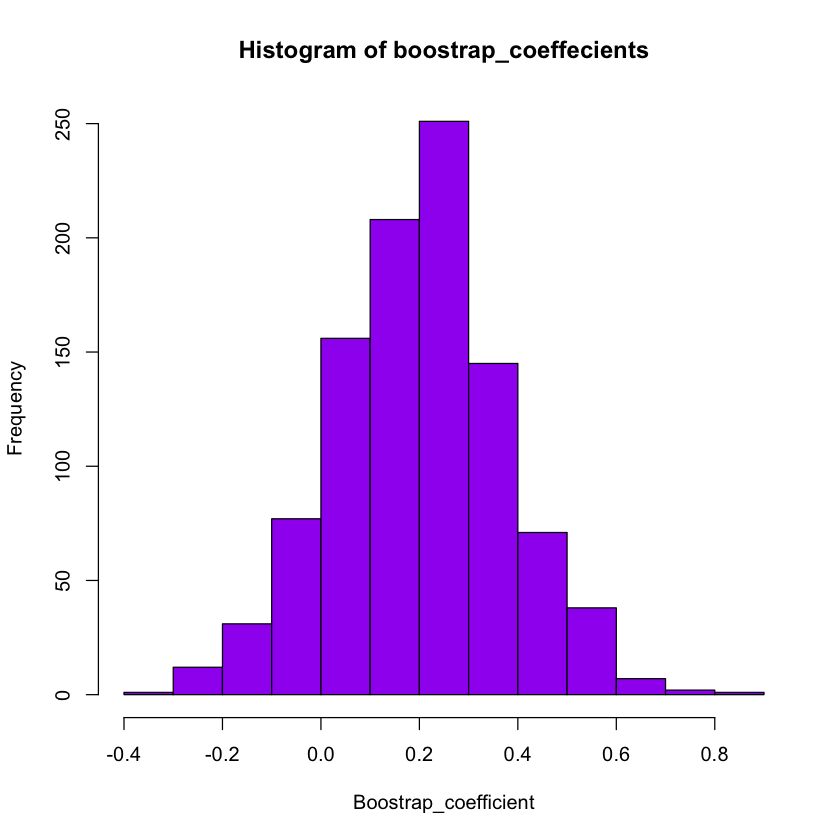

In [8]:
# let's see the frequency of the bootstrapped values for the weight coefficient
hist(sorage_coeffient,main = "Histogram of boostrap_coeffecients", xlab ="Boostrap_coefficient", col="purple")

In [7]:
#problem 4
Squared_r <- function(actual, predicted) {
  Tss <- sum((observed - mean(observed))**2)
  Rss <- sum((observed - predicted)**2) 
   return(1-Rss/Tss)
}

model_3<-lm(group2~weight,data = PlantGrowth_1)
predict_1<-predict(model_3)
predict_1

Squared_r_1<-Squared_r(PlantGrowth_1$group2,predict_1)
squared_r_2<-summary(model_3)$r.squared
squared_r_2

table(Squared_r_1, squared_r_2)

1         2         3         4         5         6         7         8 
0.3667466 0.6444809 0.5656910 0.7488775 0.4317483 0.4534155 0.5637213 0.4376575 
        9        10        11        12        13        14        15        16 
0.5952372 0.5578121 0.4928104 0.3667466 0.4140206 0.2525013 0.7016036 0.2997753 
       17        18        19        20 
0.7331195 0.5085684 0.3962928 0.4691735

ERROR: Error in Squared_r(PlantGrowth_1$group2, predict_1): object 'observed' not found


In [10]:
#problem 5
install.packages("readstata13")
library(readstata13)
library(foreign)
setwd("C:/Users/Nareg Baghous/Desktop")
nsw_dta <- read.dta13("nsw.")
nsw_dta <- read.dta("nsw.dta")
nsw_dta_1 <-nsw_dta[,-1]
nsw_dta_1
set.seed(1)
model_5<-glm(treat~.-re78, data=nsw_dta_1, family = "binomial")
summary(model_5)
nsw_dta_1_treat<-nsw_dta_1[nsw_dta_1$treat==1,]
nsw_dta_1_control<-nsw_dta_1[nsw_dta_1$treat==0,]

nsw_dta_1_control_predict<-predict(model_5,data =nsw_dta_1_control,type="response" )
nsw_dta_1_treat_predict<-predict(model_5,data=nsw_dta_1_treat, type="response" )
hist(nsw_dta_1_treat_predict,col="red",main = "Histogram of estimated probabilities of treatment_group", xlab ="Probability of treatment",ylab="Density" )
hist(nsw_dta_1_control_predict,col="blue",main = "Histogram of estimated probabilities of control", xlab ="Probability of control_group",ylab="Density" )
t.test(nsw_dta_1_control_predict,nsw_dta_1_control)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in setwd("C:/Users/Nareg Baghous/Desktop"): cannot change working directory
